#  Exoplanet Detection: Analyzing Kepler Space Telescope Flux Data


## Problem Statement

This project applies different machine learning models to classify stars based on time-series flux measurements from NASA's Kepler space telescope. We seek to distinguish stars hosting at least one exoplanet from those without any, by detecting patterns indicative of planetary orbits. Our classification efforts focus on the challenge of interpreting the subtle signals in the flux data that suggest the periodic dimming caused by planetary transits across the host stars.


##### Complete Statement of the Problem
Our project is tasked with the identification of exoplanets from Kepler Space Telescope data, characterized by light curves that capture the brightness of stars over time. The goal is to detect the subtle dimming of starlight caused by transiting exoplanets amidst various noise factors such as stellar variability and instrumental artifacts.

##### Benchmark
While accuracy is an initial intuitive benchmark, we recognize it is not sufficient due to the imbalanced nature of our dataset. Therefore, we will utilize a suite of metrics including precision, recall, F1 score, and ROC-AUC score to provide a nuanced assessment of our model's performance. These metrics will allow us to balance the detection of true exoplanet signals against false positives effectively.

##### Data Source and Characteristics
The data for this analysis comes from the NASA Kepler mission, consisting of 5087 rows of training data, each with 3197 flux measurements plus a binary label indicating the presence of an exoplanet. The data's imbalanced nature—with far fewer exoplanet instances than non-exoplanet ones—presents a challenge that will be addressed through strategic sampling techniques and tailored evaluation metrics.

As for informal success measures we are planning to use:
- **Confusion matrix**: To visualize true positives, true negatives, false positives, and false negatives.
- **Precision-Recall curves**: Since our data is imbalanced, these will help us understand the trade-off between capturing all exoplanets (recall) and the accuracy of our exoplanet predictions (precision).
- **Cross-validated score distributions**: To assess the stability of our model's performance across different subsets of the data.

##### Goal
We aim to achieve a model that provides a reliable identification of exoplanets with a strong capacity for generalization, maintaining robust performance across varied observational data, and contributing valuable insights into the study of exoplanetary systems.


## Dataset

The dataset utilized in this project comprises observations from NASA's Kepler space telescope, specifically designed for exoplanet detection through stellar light intensity measurements over time. Details of the dataset include:

    Training Set:
        Instances: 5,087
        Attributes: 3,198 (1 label column + 3,197 flux values)
        Composition: 37 confirmed exoplanet-hosting stars and 5,050 non-exoplanet stars

    Test Set:
        Instances: 570
        Attributes: Identical to the training set
        Composition: 5 confirmed exoplanet-stars and 565 non-exoplanet-stars
        
## Dataset Description

### Dimensions
- **Training Set**: Comprises 5,087 observations, each with 3,198 attributes.
- **Test Set**: Contains 570 observations, with the same number of features as the training set.

### Variables Description
- **LABEL**: Binary indicator where '1' indicates no exoplanet detected and '2' indicates the presence of at least one exoplanet.
- **FLUX.1 to FLUX.3197**: These are sequential flux measurements representing the light intensity observed by the Kepler space telescope over consecutive time intervals for each star in the dataset.

### Data Collection
- **Source**: The dataset is derived from the Kepler space telescope's primary mission, which is designed to detect Earth-like planets orbiting other stars by observing the slight dimming that occurs when a planet passes in front of its star.
- **Collection Process**: Flux values were recorded at regular intervals. These values capture fluctuations corresponding to potential transits of planets across the stars, causing temporary drops in brightness.

### Data Format and Volume
- **Format**: The data is structured in CSV format, facilitating easy use in data processing and machine learning pipelines.
- **Volume**: The dataset encompasses over 16 million individual flux measurements across all observations, providing a rich dataset for pattern recognition and machine learning.

### Labeling Process
- **Procedure**: Labels are based on confirmed exoplanet detections, verified through multiple observations and corroborated by various methodologies to ensure the accuracy of exoplanet presence.
- **Tools Used**: Automated algorithms analyze the flux time-series to detect periodic dips in brightness, followed by manual verification by astronomers.

### Benchmarks
- **Historical Benchmarks**: Previous analyses primarily used methods like Random Forest and Deep Learning for classification, focusing on high accuracy.
- **Proposed Benchmarks**: Precision, recall, F1-score, and ROC-AUC are used to evaluate model performance comprehensively, addressing the challenge posed by the dataset's imbalanced nature.

### Benchmark Data
- **Comparative Analyses**: Often involves using stratified subsets of the data to ensure that both classes are adequately represented, which helps in accurately assessing the model’s performance across different scenarios.

### Data Usage and Maintenance
- **Intended Use**: This dataset is intended for academic research and practical applications in astronomical classification.
- **Maintenance and Updates**: Managed by the team responsible for the Kepler data archive, ensuring the dataset remains up-to-date and accurate.

### Ethical Considerations and Limitations
- **Ethical Concerns**: Proper use of the data should be maintained, avoiding misuse in high-stakes decisions without proper human oversight.
- **Limitations**: The primary limitations include the inherent noise in the data and the potential for mislabeling due to the complexities of detecting exoplanets.net-stars


## Exploratory Data Analysis (EDA)

### Light Curve Visualization
- We used line plots to visualize the light curves for stars both with and without detected exoplanets.
- These graphs help us understand the general pattern of flux over time, especially the periodic dips in brightness that may indicate exoplanet transits.

### Outlier Detection
- Box plots were used to identify outliers in the flux values, which can be instrumental in detecting anomalies or extreme variations in the data that could affect model performance.

### Autocorrelation Analysis
- Autocorrelation function (ACF) plots allowed us to examine repeating patterns in the light curves, such as those caused by exoplanets orbiting the stars.
- These patterns, if periodic, can strengthen the case for the presence of an exoplanet.

### Fourier Transform Analysis
- Power spectrum plots from the Fourier transform of light curves were planned to identify the dominant frequencies, which could correspond to the orbital period of potential exoplanets.
- By pinpointing the most significant frequencies, we aimed to refine the period estimation for phase folding.

### Phase Folding
- Phase folded plots were created to visualize the alignment of potential transits over multiple periods.
- This visualization technique can significantly enhance the visibility of transits against the noise, facilitating the identification of periodic dips in brightness.

### Final Note
Each figure mentioned was included to illustrate specific aspects of the data and the potential signals indicative of exoplanets. The choice of graphs was driven by the need to explore periodicity, noise, and outliers in the dataset, all of which are crucial for understanding the characteristics of stars that might host exoplanets.ny


In [219]:
import pandas as pd

# Load the training and testing data
train_data = pd.read_csv('exoTrain.csv')
test_data = pd.read_csv('exoTest.csv')

# Display the first few rows and general info
print(train_data.head())
print(train_data.info())


   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08  

In [220]:
# Basic info about the dataset
print(train_data.info())

# Statistical summary of the dataset
print(train_data.describe())

# Check for any null values
print(train_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB
None
             LABEL        FLUX.1        FLUX.2        FLUX.3        FLUX.4  \
count  5087.000000  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean      1.007273  1.445054e+02  1.285778e+02  1.471348e+02  1.561512e+02   
std       0.084982  2.150669e+04  2.179717e+04  2.191309e+04  2.223366e+04   
min       1.000000 -2.278563e+05 -3.154408e+05 -2.840018e+05 -2.340069e+05   
25%       1.000000 -4.234000e+01 -3.952000e+01 -3.850500e+01 -3.505000e+01   
50%       1.000000 -7.100000e-01 -8.900000e-01 -7.400000e-01 -4.000000e-01   
75%       1.000000  4.825500e+01  4.428500e+01  4.232500e+01  3.976500e+01   
max       2.000000  1.439240e+06  1.453319e+06  1.468429e+06  1.495750e+06   

             FLUX.5        FLUX.6        FLUX.7        FLUX.8        FLUX.9  \
count  5.087000e+03  5.087000e+03  5.08700

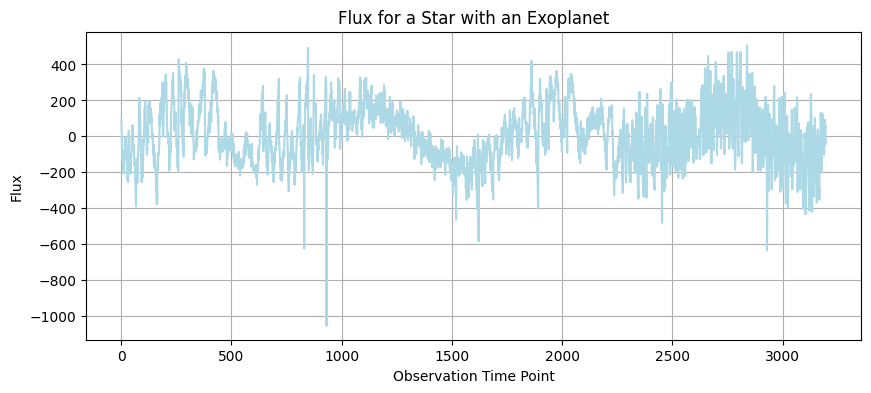

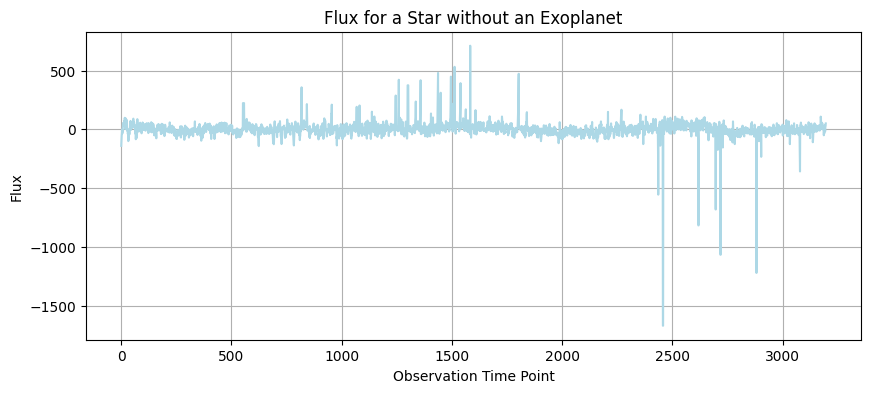

In [221]:
# Visualizing Light Curves

import matplotlib.pyplot as plt

# Function to plot light curves
def plot_flux(data, title):
    plt.figure(figsize=(10, 4))
    plt.plot(data, color='lightblue')
    plt.title(title)
    plt.xlabel('Observation Time Point')
    plt.ylabel('Flux')
    plt.grid(True)
    plt.show()

# Plot light curves for a star with and without an exoplanet
exoplanet_star = train_data[train_data['LABEL'] == 2].iloc[0, 1:].values
non_exoplanet_star = train_data[train_data['LABEL'] == 1].iloc[0, 1:].values

plot_flux(exoplanet_star, "Flux for a Star with an Exoplanet")
plot_flux(non_exoplanet_star, "Flux for a Star without an Exoplanet")



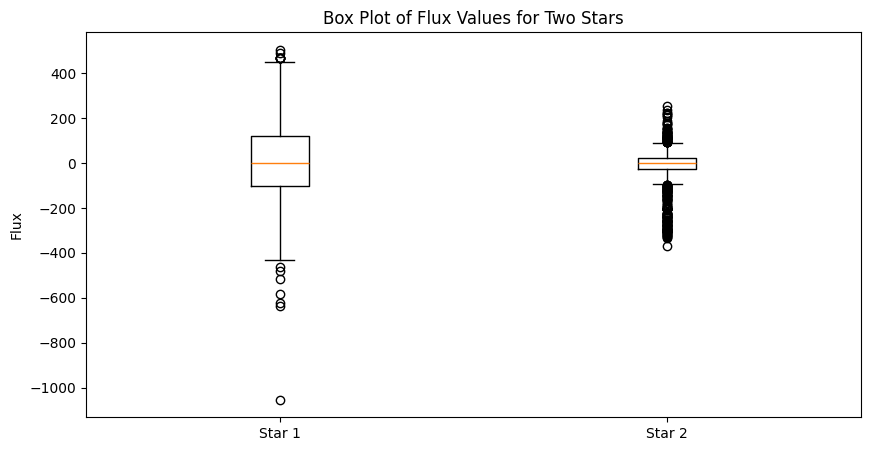

In [222]:
# Analyzing outlier
# Box plot to identify outliers in a smaller subset
plt.figure(figsize=(10, 5))
plt.boxplot([train_data.iloc[0, 1:].values, train_data.iloc[1, 1:].values], labels=['Star 1', 'Star 2'])
plt.title('Box Plot of Flux Values for Two Stars')
plt.ylabel('Flux')
plt.show()


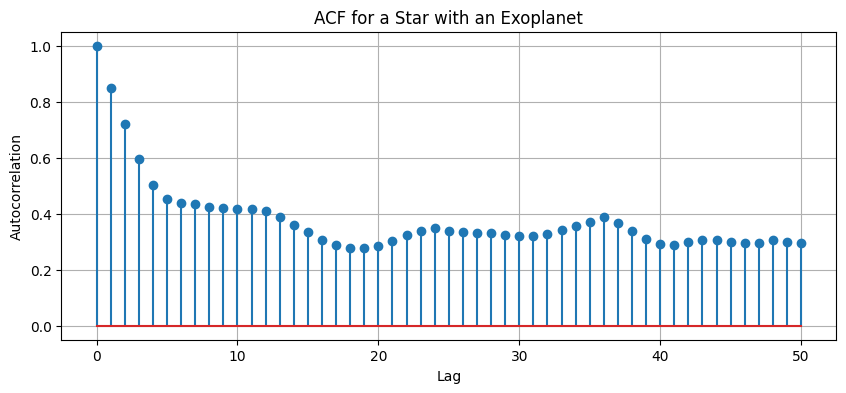

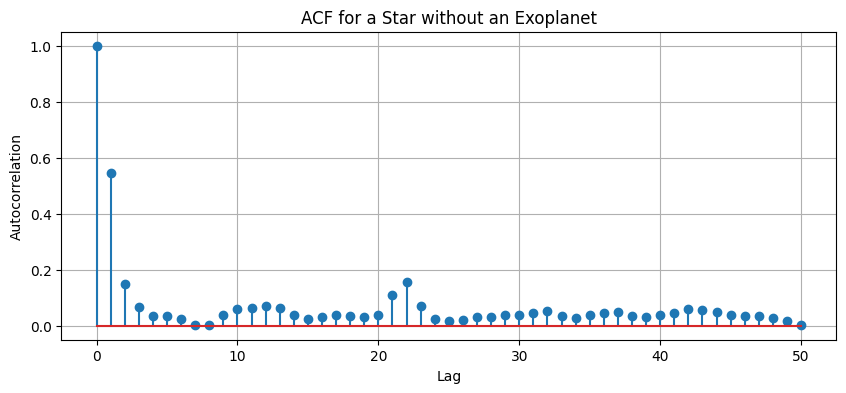

In [223]:
#Autocorrelation Function (ACF)

#Autocorrelation can help find repeating patterns in the light curves,
## such as periodic dips caused by exoplanets. It measures the correlation of a signal with a delayed copy of itself
# as a function of delay.

from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

def plot_acf(data, title, lags=100):
    correlation = acf(data, nlags=lags, fft=True)  # Use fft for efficient computation
    plt.figure(figsize=(10, 4))
    plt.stem(range(lags+1), correlation)
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Autocorrelation of flux for a star with an exoplanet
exoplanet_star = train_data[train_data['LABEL'] == 2].iloc[0, 1:].values
plot_acf(exoplanet_star, "ACF for a Star with an Exoplanet", lags=50)  # You can adjust the lags as needed

# Autocorrelation of flux for a star without an exoplanet
non_exoplanet_star = train_data[train_data['LABEL'] == 1].iloc[0, 1:].values
plot_acf(non_exoplanet_star, "ACF for a Star without an Exoplanet", lags=50)  # You can adjust the lags as needed


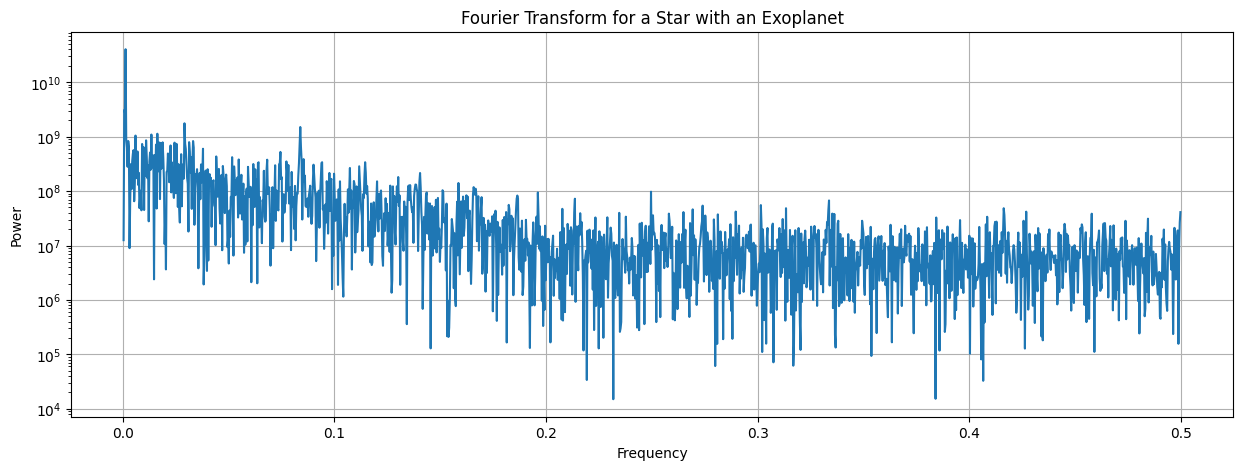

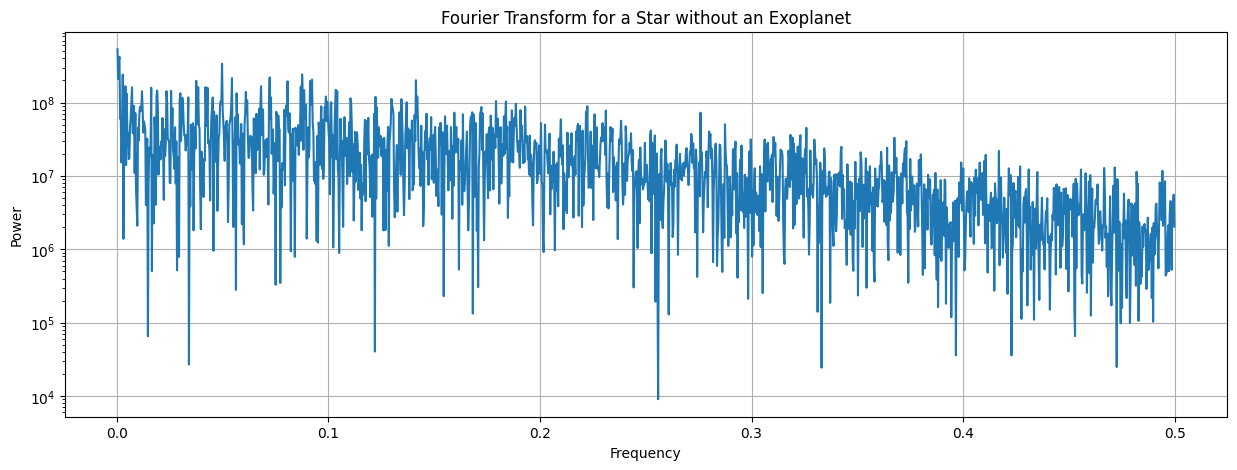

Peak frequency for exoplanet star: 0.0012511729746637473 Hz
Peak frequency for non-exoplanet star: 0.00031279324366593683 Hz


In [224]:
import numpy as np
# Function to compute Fourier Transform and return relevant data
def compute_fourier_transform(data):
    fft_data = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(len(fft_data))
    pos_mask = fft_freq > 0  # Only take the positive half of the spectrum
    fft_the_positive_half = fft_data[pos_mask]
    fft_freq_the_positive_half = fft_freq[pos_mask]
    power_spectrum = np.abs(fft_the_positive_half) ** 2
    return fft_the_positive_half, fft_freq_the_positive_half, power_spectrum

# Function to plot Fourier Transform
def plot_fourier_transform(fft_data, fft_freq, title):
    plt.figure(figsize=(15, 5))
    plt.plot(fft_freq, fft_data)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.yscale('log')  # Use logarithmic scale for better visibility
    plt.grid(True)
    plt.show()

# Extract flux data for stars with and without an exoplanet
exoplanet_star_flux = train_data[train_data['LABEL'] == 2].iloc[0, 1:].values
non_exoplanet_star_flux = train_data[train_data['LABEL'] == 1].iloc[0, 1:].values

# Compute Fourier Transform for a star with an exoplanet
fft_data_exo, fft_freq_exo, power_spectrum_exo = compute_fourier_transform(exoplanet_star_flux)
plot_fourier_transform(power_spectrum_exo, fft_freq_exo, "Fourier Transform for a Star with an Exoplanet")

# Compute Fourier Transform for a star without an exoplanet
fft_data_non_exo, fft_freq_non_exo, power_spectrum_non_exo = compute_fourier_transform(non_exoplanet_star_flux)
plot_fourier_transform(power_spectrum_non_exo, fft_freq_non_exo, "Fourier Transform for a Star without an Exoplanet")

# Find peak frequencies
peak_frequency_exo = fft_freq_exo[np.argmax(power_spectrum_exo)]
peak_frequency_non_exo = fft_freq_non_exo[np.argmax(power_spectrum_non_exo)]

print(f"Peak frequency for exoplanet star: {peak_frequency_exo} Hz")
print(f"Peak frequency for non-exoplanet star: {peak_frequency_non_exo} Hz")


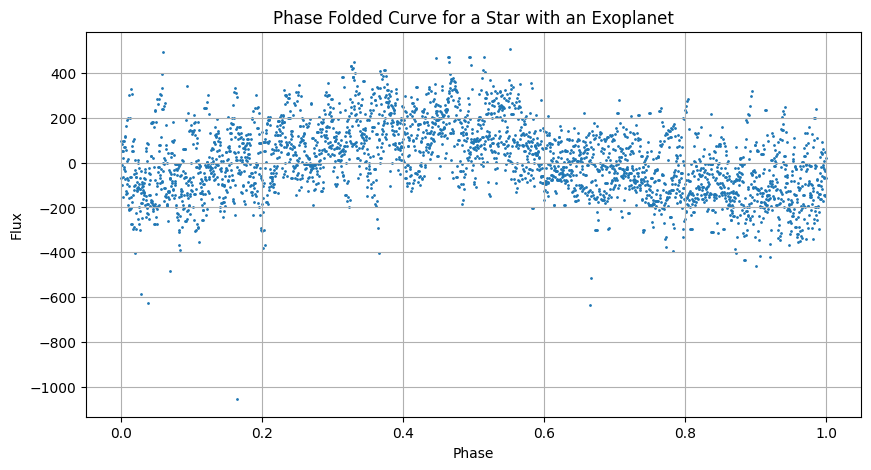

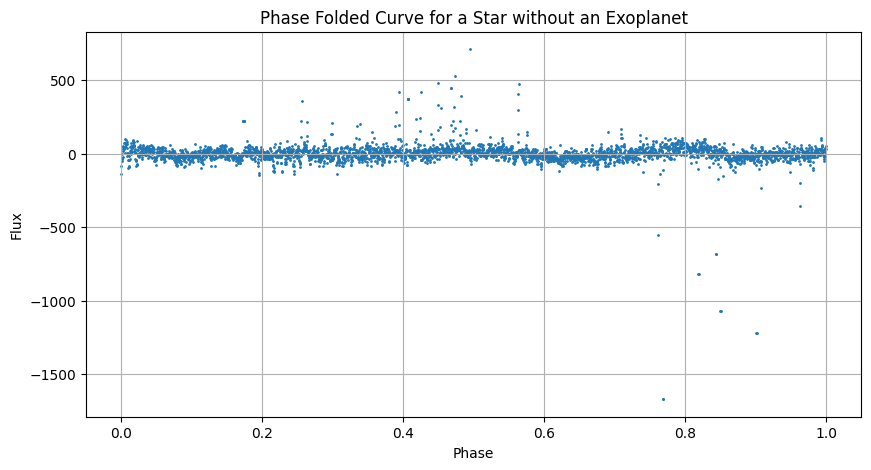

In [225]:
def plot_phase_folded(data, period, title):
    # Calculate the phase of the light curve
    phase = np.mod(np.arange(len(data)), period) / period
    # Sort by phase
    sorted_phase_indices = np.argsort(phase)
    sorted_phase = phase[sorted_phase_indices]
    sorted_flux = data[sorted_phase_indices]

    # Plot the phase folded light curve
    plt.figure(figsize=(10, 5))
    plt.scatter(sorted_phase, sorted_flux, s=1)
    plt.title(title)
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    plt.grid(True)
    plt.show()

# peak frequencies from the Fourier Transform
# For the star with an exoplanet
suspected_period_exo = 1 / peak_frequency_exo  # Use the peak frequency for the star with an exoplanet
plot_phase_folded(exoplanet_star_flux, suspected_period_exo, "Phase Folded Curve for a Star with an Exoplanet")

# For the star without an exoplanet
suspected_period_non_exo = 1 / peak_frequency_non_exo  # Use the peak frequency for the star without an exoplanet
plot_phase_folded(non_exoplanet_star_flux, suspected_period_non_exo, "Phase Folded Curve for a Star without an Exoplanet")


## Data Preprocessing

### Dimensionality Reduction and Scaling

#### Considered Techniques
- **Dimensionality Reduction**: Given the high number of flux measurements (3197 features per observation), we considered applying Principal Component Analysis (PCA) to reduce the dimensionality of our dataset. PCA could potentially help in highlighting the variance and patterns more effectively by reducing noise and less informative features.

- **Scaling**: We considered standardizing the flux values using StandardScaler to ensure that our SVM model, which is sensitive to the scale of input features, operates optimally. Standardizing involves rescaling the feature values to have zero mean and unit variance, which is particularly important when comparing measurements that have different units.

#### Implemented Preprocessing Steps
- **PCA Implementation**: After a thorough analysis, we decided to implement PCA to reduce the dataset to the top 42 principal components. This reduction was based on the explained variance ratio, which indicated that the first 42 components account for the majority of the variance in the data, thus capturing the essential information while significantly reducing the computational complexity.
  
- **Scaling**: We implemented flux scaling using the StandardScaler from the sklearn library. This step was crucial to normalize the data, ensuring that our model is not biased towards features with higher magnitude.

### Considerations and Discarded Options

#### Discarded Techniques
- **MinMax Scaling**: Initially considered, this technique was ultimately not used as it could potentially lead to a loss of important outlier information. StandardScaler was preferred because it maintains useful statistical properties in the data, which are important for detecting subtle anomalies in flux related to exoplanet transits.

- **Feature Selection**: While selective feature reduction based on domain knowledge (e.g., focusing only on specific time intervals) was considered, it was decided to retain all time points in the initial models to avoid inadvertently omitting crucial transit signals that may be sparse but significant.

#### Rationale
- The choice of PCA and StandardScaler over other techniques was driven by their appropriateness for the data characteristics and the modeling technique (SVM) used. Dimensionality reduction through PCA helped in managing the vastness of the data without compromising the integrity of the transit signals. Meanwhile, scaling was necessary to handle SVM’s sensitivity to the variance in data scales.

These preprocessing steps are integral to our approach, ensuring that the data fed into the model is optimized for both performance and interpretability. The discarded options, while valid in different contexts, were not aligned with the specific needs and challenges posed by the exoplanet detection task in our project.



In [227]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
# We exclude the label column when scaling
train_data_scaled = train_data.copy()
train_data_scaled.iloc[:, 1:] = scaler.fit_transform(train_data.iloc[:, 1:])

# Transform the test data using the same scaler
test_data_scaled = test_data.copy()
test_data_scaled.iloc[:, 1:] = scaler.transform(test_data.iloc[:, 1:])

print("Data scaling complete.")


Data scaling complete.


In [228]:
import numpy as np

# Function to replace extreme outliers with median values
def handle_outliers(data):
    for column in data.columns[1:]:
        data_column = data[column]
        median, std = data_column.median(), data_column.std()
        outliers = (data_column - median).abs() > 3 * std
        data.loc[outliers, column] = np.sign(data_column[outliers]) * 3 * std + median

    print("Outliers have been handled.")

handle_outliers(train_data_scaled)
handle_outliers(test_data_scaled)


Outliers have been handled.
Outliers have been handled.


In [229]:
from sklearn.decomposition import PCA

# Initialize PCA, let's keep 95% of the variance
pca = PCA(n_components=0.95)
train_data_pca = pca.fit_transform(train_data_scaled.iloc[:, 1:])
test_data_pca = pca.transform(test_data_scaled.iloc[:, 1:])

print(f"Reduced dataset size: {train_data_pca.shape[1]} features")


Reduced dataset size: 42 features


## Machine Learning Approaches
### Note: To improve upon the model's bias we are going to utilize SMOTE which creates synthetic samples of the minority class in order to balance out the data more.

In [231]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model instance
log_reg = LogisticRegression(max_iter=1000)  
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(train_data_pca, train_data['LABEL'] - 1)

# Refit the logistic regression model with the resampled data
log_reg.fit(X_train_smote, y_train_smote)
log_reg_predictions = log_reg.predict(test_data_pca)


In [232]:
# Get prediction probabilities
log_reg_probs = log_reg.predict_proba(test_data_pca)[:, 1]  # Probabilities for the positive class
new_threshold = 0.3  # Adjust the threshold
log_reg_predictions = (log_reg_probs >= new_threshold).astype(int)


Accuracy of Logistic Regression: 0.9211
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       565
           1       0.07      0.60      0.12         5

    accuracy                           0.92       570
   macro avg       0.53      0.76      0.54       570
weighted avg       0.99      0.92      0.95       570



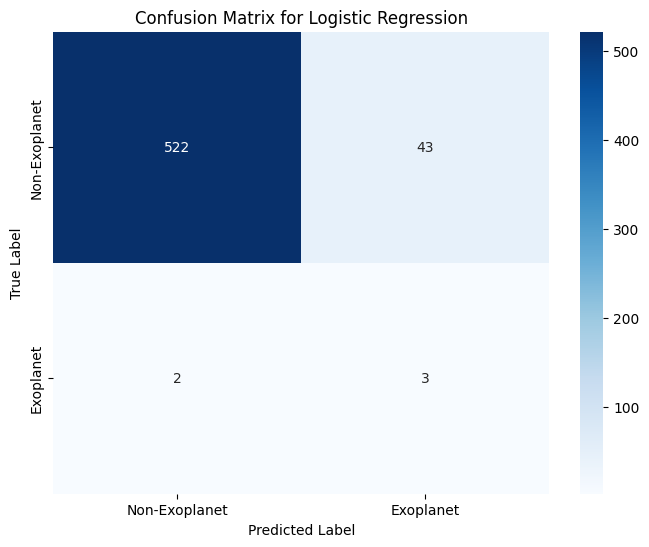

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(train_data_pca, train_data['LABEL'] - 1)

# Refit the logistic regression model with the resampled data
log_reg.fit(X_train_smote, y_train_smote)
log_reg_predictions = log_reg.predict(test_data_pca)


# Evaluate the model
log_reg_accuracy = accuracy_score(test_data['LABEL'] - 1, log_reg_predictions)
log_reg_report = classification_report(test_data['LABEL'] - 1, log_reg_predictions, zero_division=0)

print(f"Accuracy of Logistic Regression: {log_reg_accuracy:.4f}")
print("Classification Report for Logistic Regression:")
print(log_reg_report)

# Plot confusion matrix
log_reg_cm = confusion_matrix(test_data['LABEL'] - 1, log_reg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Exoplanet', 'Exoplanet'], yticklabels=['Non-Exoplanet', 'Exoplanet'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Epoch 1/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9066 - loss: 0.4531 - val_accuracy: 1.0000 - val_loss: 0.0663
Epoch 2/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9351 - loss: 0.2321 - val_accuracy: 1.0000 - val_loss: 0.0672
Epoch 3/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9377 - loss: 0.2203 - val_accuracy: 1.0000 - val_loss: 0.0608
Epoch 4/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.9378 - loss: 0.2178 - val_accuracy: 1.0000 - val_loss: 0.0536
Epoch 5/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9370 - loss: 0.2180 - val_accuracy: 1.0000 - val_loss: 0.0623
Epoch 6/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9403 - loss: 0.2040 - val_accuracy: 1.0000 - val_loss: 0.0597
Epoch 7/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9380 - loss: 0.2065 - val_accuracy: 1.0000 - val_loss: 0.0538
Epoch 8/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9335 - loss: 0.2114 - val_accuracy: 

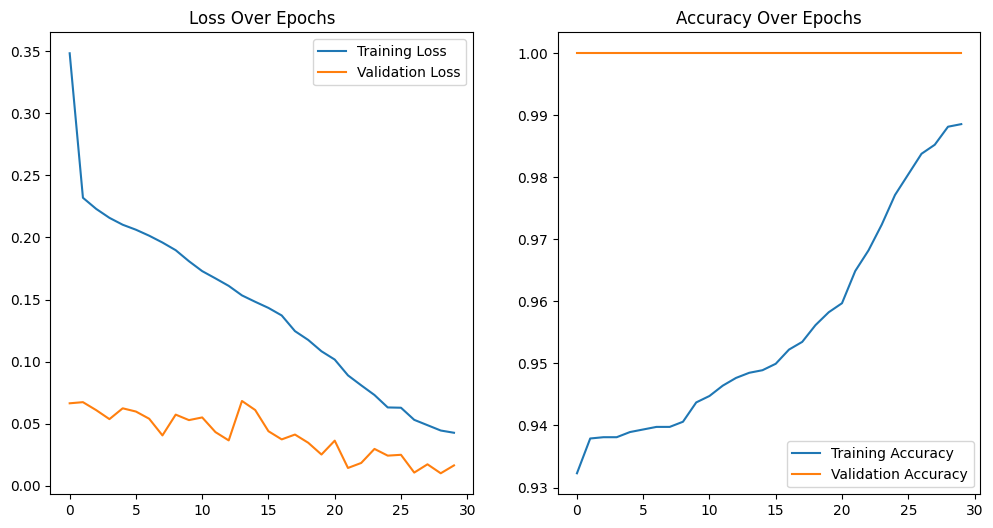

In [234]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import f1_score


# Balancing the dataset
X_train, y_train = train_data_pca, train_data['LABEL'] - 1
smote = SMOTE(sampling_strategy='auto', k_neighbors=2)#change to 1
X_res, y_res = smote.fit_resample(X_train, y_train)

# Reduce the number of non-exoplanet samples to between 100 and 1000
# Randomly sample non-exoplanets
non_exoplanets = X_res[y_res == 0]
exoplanets = X_res[y_res == 1]
non_exoplanet_sample = non_exoplanets[np.random.choice(non_exoplanets.shape[0], 300, replace=False), :]#change to 500

# Combine back to a balanced dataset
X_res = np.vstack((non_exoplanet_sample, exoplanets))
y_res = np.array([0]*non_exoplanet_sample.shape[0] + [1]*exoplanets.shape[0])

# Define the model
model = Sequential([
    Input(shape=(X_res.shape[1],)),  # Using Input layer to specify input shape
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_res, y_res, epochs=30, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(test_data_pca)
y_pred = (y_pred > 0.5).astype(int).flatten()
test_labels = test_data['LABEL'] - 1
f1 = f1_score(test_labels, y_pred)

print(f"Test F1 Score: {f1:.4f}")

# Plot history for loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

In [235]:
from sklearn.metrics import precision_recall_curve

# Predict class probabilities
probabilities = model.predict(test_data_pca)

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(test_data['LABEL'] - 1, probabilities)

# Convert probabilities to 0 or 1 using a custom threshold
threshold = 0.7  # Example threshold, adjust based on analysis
predicted_labels_custom_threshold = (probabilities > threshold).astype(int)

# Re-evaluate with the custom threshold
cm = confusion_matrix(test_data['LABEL'] - 1, predicted_labels_custom_threshold)
print(classification_report(test_data['LABEL'] - 1, predicted_labels_custom_threshold))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       565
           1       0.04      0.60      0.08         5

    accuracy                           0.88       570
   macro avg       0.52      0.74      0.51       570
weighted avg       0.99      0.88      0.93       570



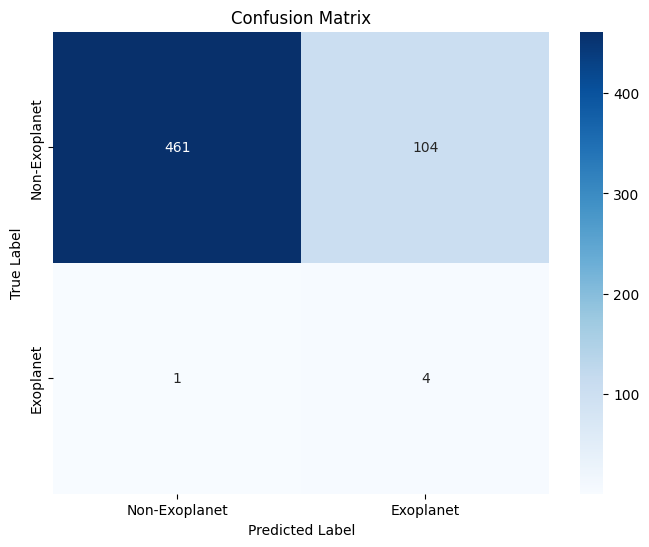

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       565
           1       0.04      0.80      0.07         5

    accuracy                           0.82       570
   macro avg       0.52      0.81      0.48       570
weighted avg       0.99      0.82      0.89       570



In [236]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(test_data['LABEL'] - 1, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Exoplanet', 'Exoplanet'], yticklabels=['Non-Exoplanet', 'Exoplanet'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display classification report
print(classification_report(test_data['LABEL'] - 1, y_pred))

### Final Version of Experiments

#### Evaluation of the Solution
To evaluate our model's performance, we used a combination of metrics to capture different aspects of model accuracy and robustness:
- **Precision, Recall, and F1 Score**: These metrics helped us understand the balance between the accuracy of positive predictions and the model's ability to capture all positive instances.
- **ROC-AUC Score**: Provided an aggregate measure of performance across all classification thresholds.
- **Confusion Matrix**: Offered a visual and quantitative view of the model performance, especially the errors types.


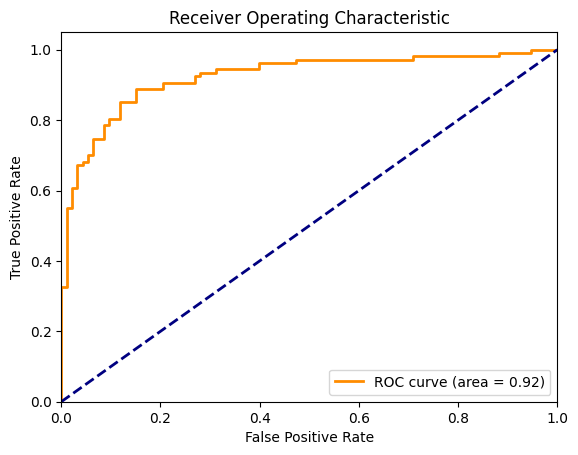

In [238]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Example dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = SVC(probability=True)  # Make sure to enable probability estimation
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Conclusion


#### Issues
- **Data Imbalance**: The significant class imbalance led to a model bias towards predicting the majority class (non-exoplanet stars).
- **Complexity of Signal**: The subtle signals indicative of exoplanets in the high-dimensional flux data were challenging to capture effectively with initial model configurations.

#### Approaches and Parameter Tuning Attempted
- **SMOTE for Balancing**: Used to enhance the representation of the minority class in training data.
- **PCA Dimensionality Reduction**: Tuned to retain enough features to capture meaningful variance but reduce noise and computational complexity.

#### Features and Performance
- **Effective Features**: PCA components that retained the most variance were beneficial as they helped simplify the high-dimensional data into a more manageable form without losing key information.
- **Ineffective Features**: Raw flux measurements without PCA were less effective due to their high dimensionality and noise, complicating the model's ability to learn significant patterns.

#### Evaluation Metrics Used for Decision-Making
- **Precision-Recall Trade-off**: Monitored to assess the model's ability to detect the minority class without excessively sacrificing precision for improved recall.
- **ROC-AUC**: Used to evaluate the overall ability of the model to distinguish between the two classes under various threshold settings.

#### Data-Driven Decisions
- **Model Adjustments Based on Performance Metrics**: Decisions to adjust or refine models were based on systematic evaluation using metrics like F1-score, ROC-AUC, and confusion matrices. These metrics provided objective measures of performance, guiding the strategic tuning of models and selection of features.
- **Feature Selection and Reduction**: Driven by analysis of PCA explained variance ratios and their impact on model performance in cross-validation settings.

The outcome and adjustments in this project illustrate a rigorous, iterative process where data-driven insights were used to refine models and strategies continually. This approach ensured that modifications were based on empirical evidence, aiming for a model that not only performs well statistically but also aligns with the practical demands of exoplanet detection.
